<a href="https://colab.research.google.com/github/helmouafik/PROJECTS/blob/main/Neural_Network_FROM_SCRATCH_HELMOUAFIK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(r'/content/sample_data/mnist_train_small.csv')

In [ ]:
data.shape

(19999, 785)

In [ ]:
X_train=data.iloc[:,:-1].values
Y_train=data.iloc[:,-1].values
Y_train=Y_train.reshape(Y_train.shape[0],1)
X_train.shape,Y_train.shape

((19999, 784), (19999, 1))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
6,19999.0,4.470124,2.892807,0.0,2.0,4.0,7.0,9.0
0,19999.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.1,19999.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.2,19999.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.3,19999.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
0.586,19999.0,0.006000,0.600333,0.0,0.0,0.0,0.0,62.0
0.587,19999.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.588,19999.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.589,19999.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
data

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.array(data)

data[0]

array([  5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  28,  59,  50,   0,
        23,   0,   0,  32, 134, 180, 254, 206,   8,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   4,  96, 216, 23

In [ ]:
data = np.array(data)
m, r = np.shape(data)
np.random.shuffle(data)

data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:r]

data_train = data[1000:m].T
Y_train = data_dev[0]
X_train = data_dev[1:r]

In [ ]:
data_dev[0]

array([2, 3, 7, 6, 8, 4, 3, 8, 2, 8, 9, 1, 0, 0, 7, 8, 6, 3, 9, 1, 9, 3,
       7, 4, 8, 2, 3, 8, 9, 8, 3, 3, 3, 3, 8, 3, 8, 7, 0, 4, 1, 6, 9, 4,
       2, 0, 2, 4, 2, 4, 4, 6, 4, 2, 6, 2, 3, 5, 2, 6, 9, 7, 7, 2, 4, 2,
       1, 1, 6, 1, 4, 1, 1, 3, 3, 0, 1, 0, 4, 5, 7, 1, 2, 6, 8, 4, 1, 4,
       2, 0, 1, 5, 5, 8, 8, 1, 8, 1, 0, 1, 0, 2, 9, 9, 1, 1, 8, 7, 0, 8,
       6, 0, 0, 8, 5, 2, 5, 4, 1, 9, 4, 5, 2, 5, 8, 7, 4, 8, 1, 5, 8, 1,
       8, 7, 5, 1, 3, 8, 3, 1, 1, 3, 1, 4, 9, 9, 7, 6, 7, 0, 5, 2, 0, 8,
       9, 3, 0, 7, 2, 0, 4, 4, 0, 3, 4, 3, 6, 2, 1, 8, 6, 1, 0, 7, 5, 3,
       3, 9, 1, 1, 1, 7, 6, 1, 3, 3, 4, 5, 2, 5, 0, 7, 7, 9, 5, 7, 6, 2,
       8, 2, 3, 7, 4, 5, 9, 2, 2, 8, 9, 3, 9, 9, 1, 0, 6, 5, 4, 2, 9, 9,
       1, 2, 6, 5, 2, 1, 7, 6, 2, 8, 1, 8, 6, 1, 6, 5, 7, 0, 9, 1, 6, 9,
       8, 2, 3, 5, 9, 1, 5, 9, 3, 7, 7, 4, 0, 8, 9, 1, 2, 5, 9, 3, 4, 9,
       3, 9, 6, 9, 3, 9, 4, 6, 8, 7, 6, 5, 7, 9, 4, 1, 6, 4, 3, 4, 3, 3,
       1, 3, 9, 1, 0, 1, 5, 6, 8, 1, 1, 8, 4, 5, 3,

In [ ]:
data_dev

array([[2, 3, 7, ..., 3, 9, 7],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
np.random.randn(10, 784) -0.5 # between 0-1 (Relu)

array([[ 0.26799919,  0.4383387 ,  0.19081058, ...,  0.17785804,
        -1.33642211,  0.82730724],
       [ 0.89849639, -1.35534898, -2.63940782, ...,  0.11606132,
         0.57892948, -2.29508717],
       [-1.69738109, -0.17847803,  0.33295767, ..., -1.7566619 ,
        -0.64744959, -1.69458776],
       ...,
       [ 1.53070162, -0.92774498, -1.03320164, ...,  0.47661919,
        -1.29810573, -0.23160726],
       [-1.12505079, -0.77184392, -1.48711969, ..., -2.18819682,
        -1.32213251, -0.79803162],
       [ 0.68581842, -1.33518542, -1.0454125 , ..., -0.90983372,
        -1.19869567, -0.07310009]])

In [ ]:
Y = np.random.randn(3, 3).astype(int)

In [ ]:
Y

array([[ 1,  0,  1],
       [-1, -1,  0],
       [ 0,  1,  0]])

In [ ]:
one_hot_Y = np.zeros((Y.size, Y.max() + 1))

np.arange(Y.size)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
def init_params():
    W1 = np.random.randn(10, 784) - 0.5
    b1 = np.random.randn(10, 1) - 0.5
    W2 = np.random.randn(10, 10) - 0.5
    b2 = np.random.randn(10, 1) - 0.5
    return W1, b1, W2, b2

def Relu(z):
    return np.maximum(0, z)

def Softmax(z):
    return np.exp(z)/np.sum(np.exp(z))


def forward_prop(W1, b1, W2, b2, x):
    # x = A0
    Z1 = W1.dot(x) + b1
    a1 = Relu(Z1)
    
    Z2 = W2.dot(a1) + b1
    a2 = Softmax(Z2)
    return Z1, a1, Z2, a2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  2


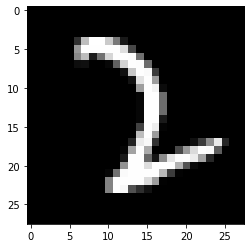

Prediction:  [3]
Label:  3


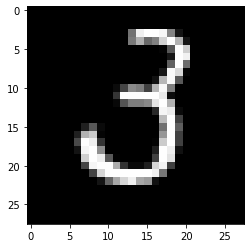

Prediction:  [3]
Label:  7


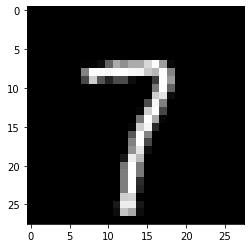

Prediction:  [3]
Label:  6


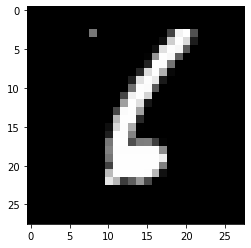

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)